# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import precision_recall_fscore_support

import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image

Using TensorFlow backend.


# Import Dataset

In [2]:
with open('./traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)

with open('./traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)

with open('./traffic-signs-data/valid.p', mode='rb') as validating_data:
    valid = pickle.load(validating_data)
    

You can find the dataset here - https://drive.google.com/drive/folders/1eucNODwdzWcyyC99eKAILsikMGot28o7?usp=sharing

In [3]:
X_train, y_train = train['features'], train['labels']

In [4]:
X_valid, y_valid = valid['features'], valid['labels']

In [5]:
X_test, y_test = test['features'], test['labels']

In [6]:
print(X_train.shape, X_valid.shape, X_test.shape)

(34799, 32, 32, 3) (4410, 32, 32, 3) (12630, 32, 32, 3)


# Visualize Images

In [7]:
def visualize_images(data, labels, colorMap = 'viridis'):
    w_grid = 5
    l_grid = 5

    fig, axes = plt.subplots(l_grid,w_grid, figsize=(25,25))
    axes = axes.ravel()

    n_training = len(data)

    for i in np.arange(0, l_grid * w_grid):
        index = np.random.randint(0, n_training)
        axes[i].imshow(data[index], cmap = colorMap)
        axes[i].axis('off')
        axes[i].set_title(labels[index], fontsize = 24)

    plt.subplots_adjust(hspace=0.4, wspace=0.4) # add space between rows



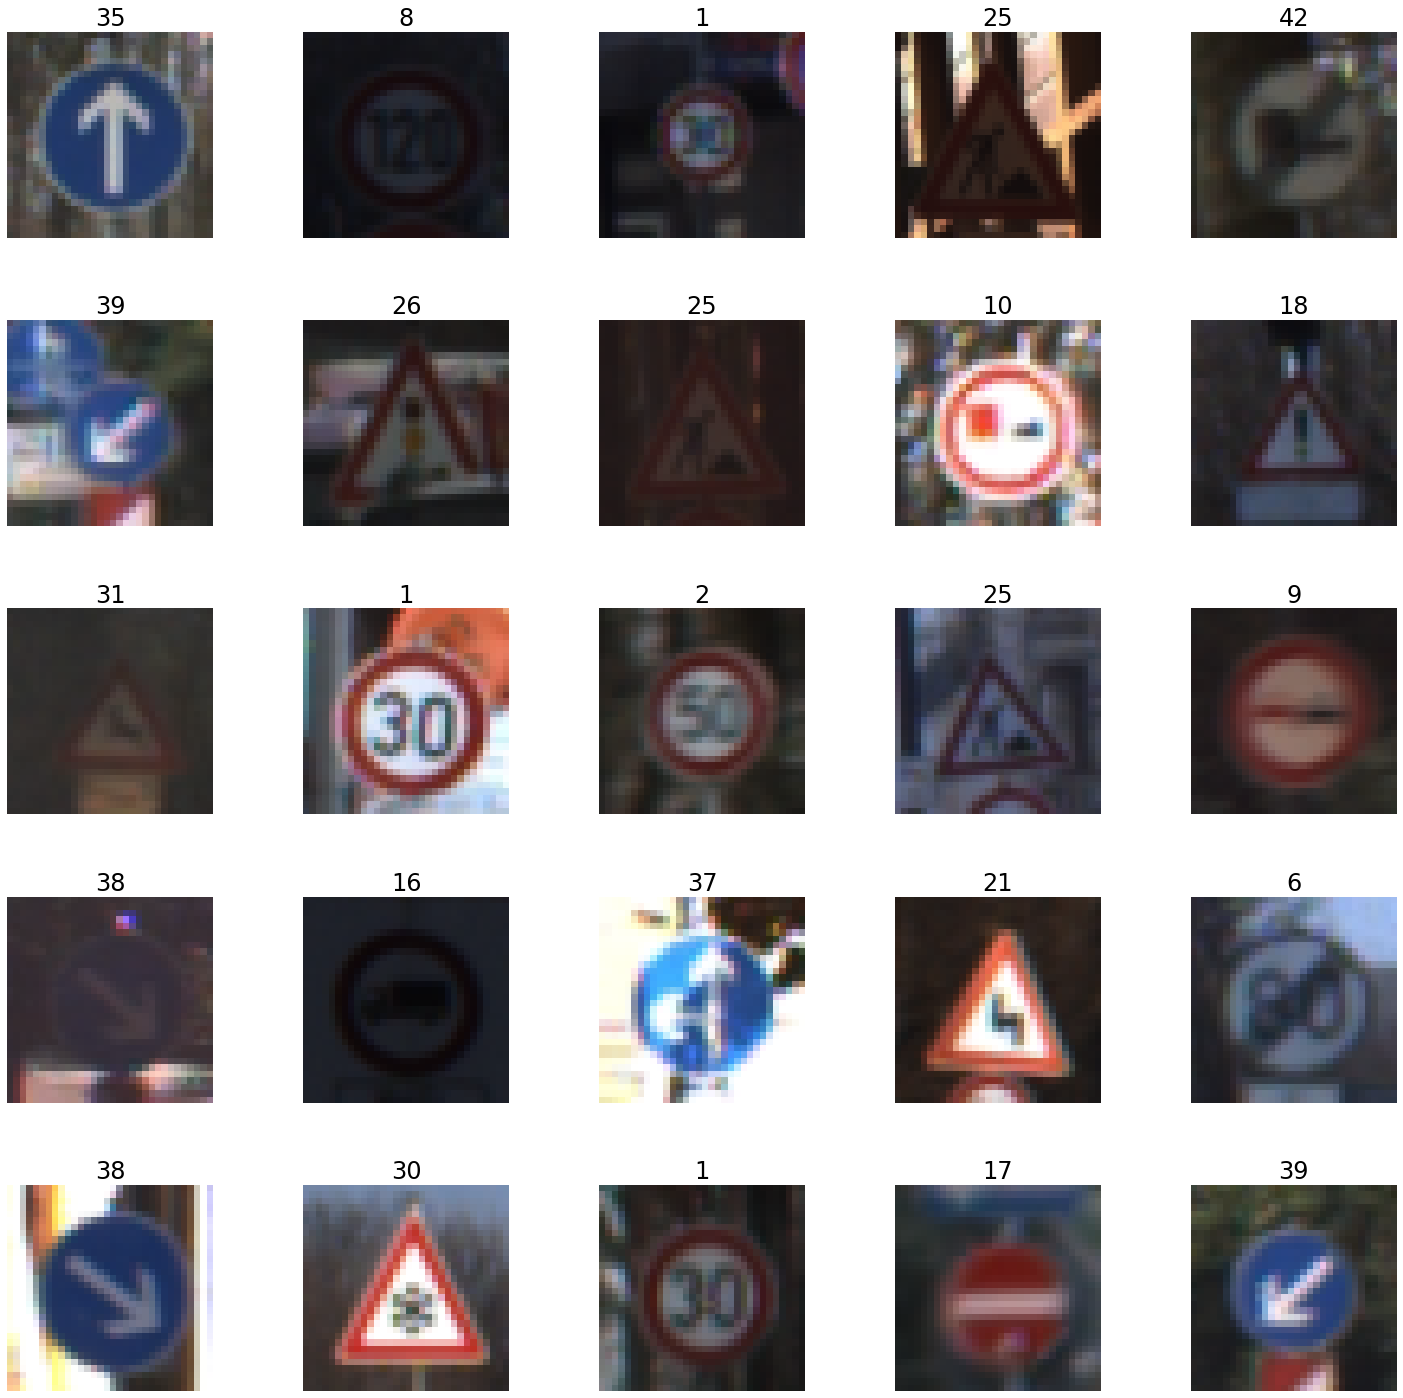

In [8]:
visualize_images(X_train, y_train)


Different signs
0. Speed limit (20km/h) |  1. Speed limit (30km/h) | 2. Speed limit (50km/h) | 3. Speed limit (60km/h) |  4. Speed limit (70km/h) | 5. Speed limit (80km/h)') |  6. End of speed limit (80km/h) | 7. Speed limit (100km/h) | 8. Speed limit (120km/h) | 9. No passing | 10. No passing for vehicles over 3.5 metric tons | 11. Right-of-way at the next intersection | 12. Priority road | 13. Yield | 14. Stop | 15. No vehicles | 16. Vehicles over 3.5 metric tons prohibited | 17. No entry | 18. General caution | 19. Dangerous curve to the left | 20. Dangerous curve to the right | 21. Double curve | 22. Bumpy road | 23. Slippery road | 24. Road narrows on the right | 25. Road work | 26. Traffic signals | 27. Pedestrians | 28. Children crossing | 29. Bicycles crossing | 30. Beware of ice/snow | 31. Wild animals crossing | 32. End of all speed and passing limits | 33. Turn right ahead | 34. Turn left ahead | 35. Ahead only | 36. Go straight or right | 37. Go straight or left | 38. Keep right | 39. Keep left | 40. Roundabout mandatory | 41. End of no passing | 42. End of no passing by vehicles over 3.5 metric tons

# Data Preprocessing

### Convert to gray scale

In [9]:
X_train_grayscale = np.sum(X_train/3, axis = 3, keepdims = True)
X_train_grayscale.shape

(34799, 32, 32, 1)

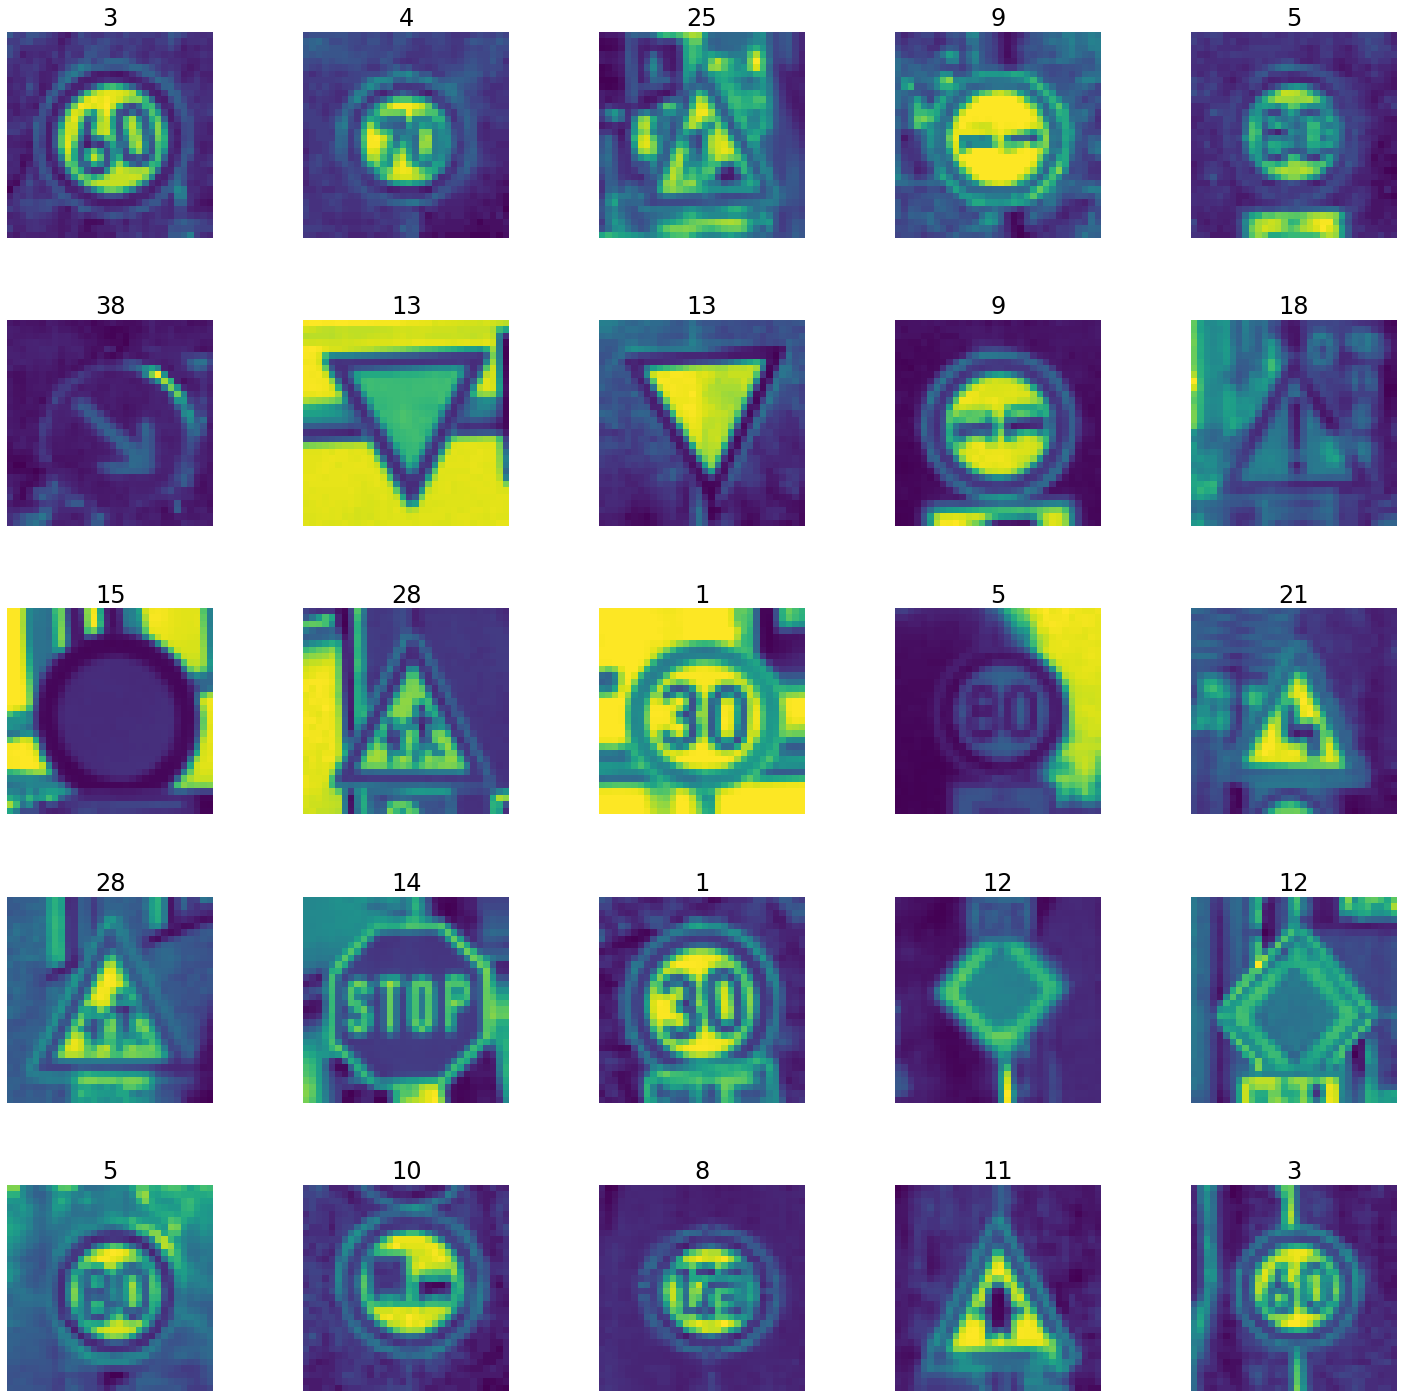

In [10]:
visualize_images(X_train_grayscale, y_train)


In [11]:
X_test_grayscale = np.sum(X_test/3, axis = 3, keepdims = True)
print(X_test_grayscale.shape)

X_valid_grayscale = np.sum(X_valid/3, axis = 3, keepdims = True)
print(X_valid_grayscale.shape)

(12630, 32, 32, 1)
(4410, 32, 32, 1)


### Normalise the data

In [12]:
X_train_norm = (X_train_grayscale - 128)/128 
X_test_norm = (X_test_grayscale - 128) / 128
X_valid_norm = (X_valid_grayscale - 128) / 128

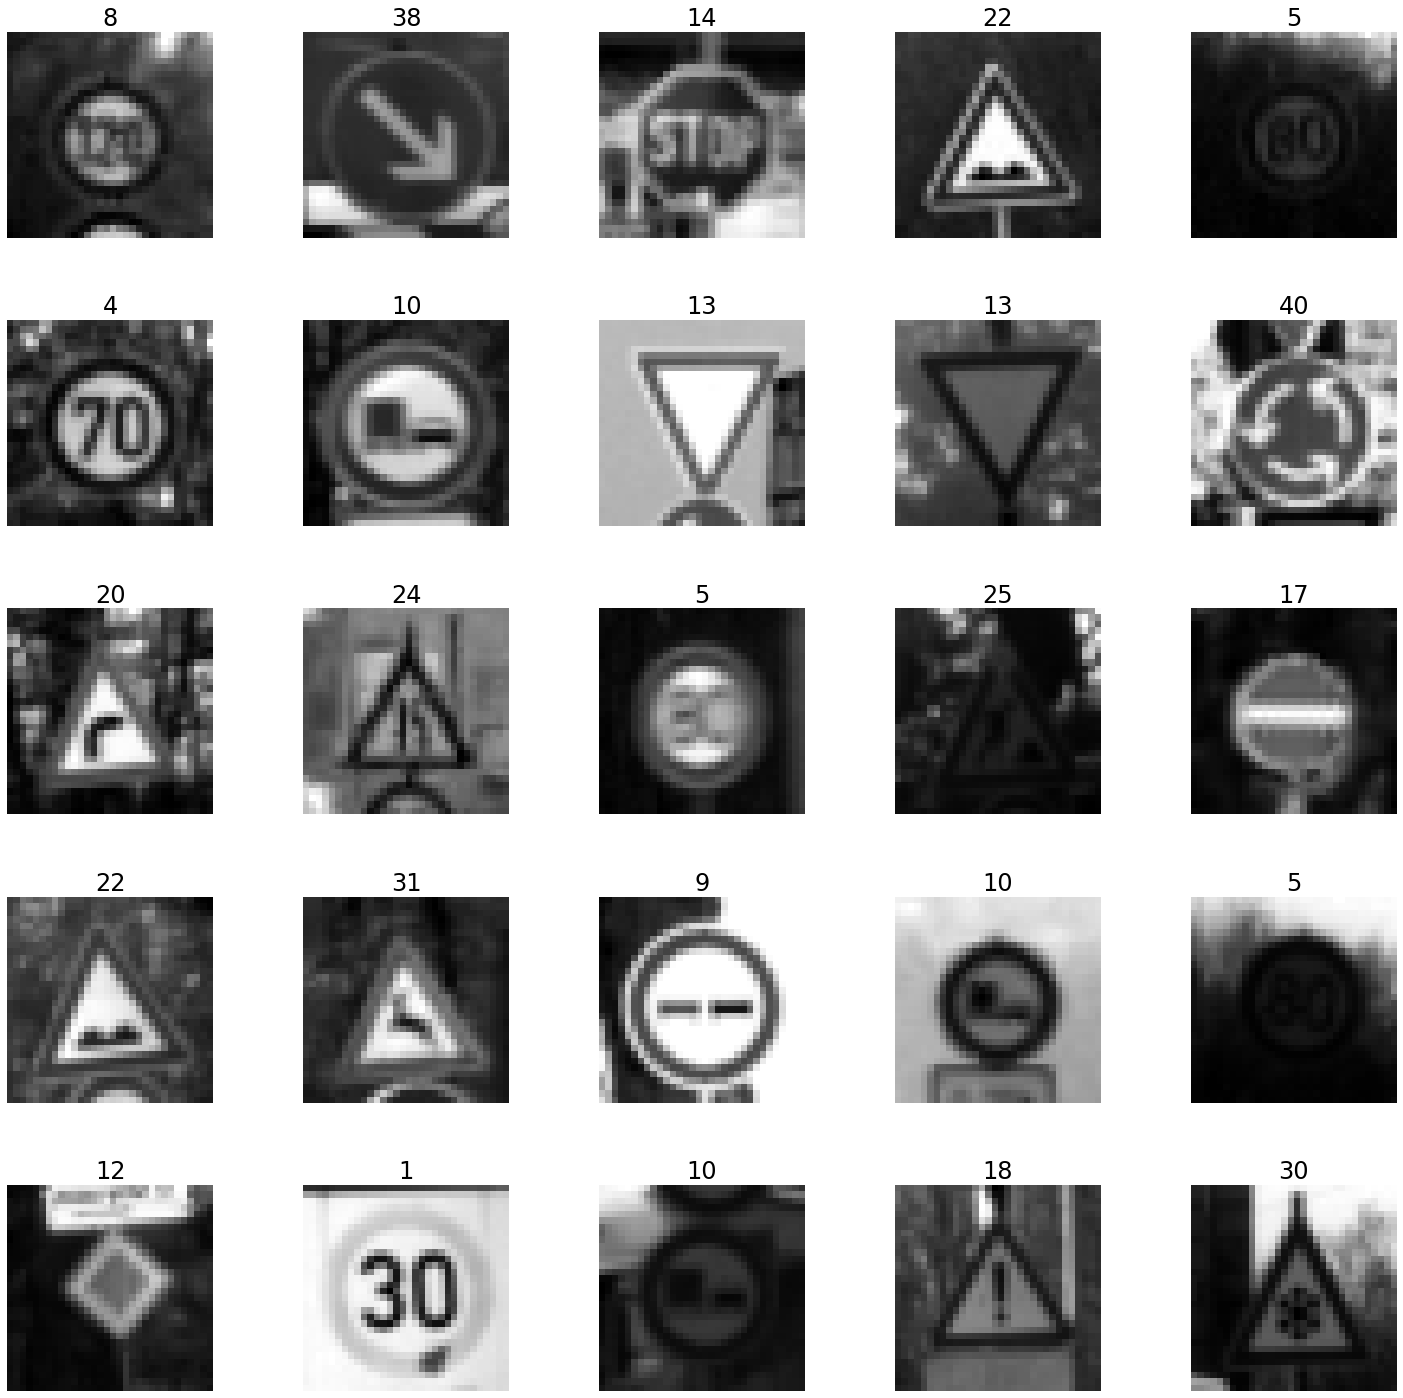

In [13]:
visualize_images(X_train_norm, y_train, 'gray')


In [14]:
# One hot encoding
y_train_encoded = keras.utils.to_categorical(y_train, num_classes = 43)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes = 43)


# Training the data

In [15]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 43, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        51232     
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics=['accuracy'])


In [17]:
history = model.fit(X_train_norm, y_train, batch_size = 500, nb_epoch = 50, verbose = 1, validation_data = (X_valid_norm, y_valid))


/Users/amrutagajananbhat/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 99s 3ms/step - loss: 3.0063 - accuracy: 0.2206 - val_loss: 2.2640 - val_accuracy: 0.3943
Epoch 2/50
34799/34799 [==============================] - 101s 3ms/step - loss: 1.2993 - accuracy: 0.6383 - val_loss: 1.1187 - val_accuracy: 0.6692
Epoch 3/50
34799/34799 [==============================] - 102s 3ms/step - loss: 0.6519 - accuracy: 0.8180 - val_loss: 0.8243 - val_accuracy: 0.7698
Epoch 4/50
34799/34799 [==============================] - 106s 3ms/step - loss: 0.4231 - accuracy: 0.8889 - val_loss: 0.6756 - val_accuracy: 0.8045
Epoch 5/50
34799/34799 [==============================] - 105s 3ms/step - loss: 0.3210 - accuracy: 0.9154 - val_loss: 0.5843 - val_accuracy: 0.8322
Epoch 6/50
34799/34799 [==============================] - 105s 3ms/step - loss: 0.2487 - accuracy: 0.9375 - val_loss: 0.6344 - val_accuracy: 0.8222
Epoch 7/50
34799/34799 [==============================] - 105s 3

# Model Evaluation

In [18]:
score = model.evaluate(X_test_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 19s 2ms/step
Test Accuracy: 0.8996832966804504


In [19]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [20]:
accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

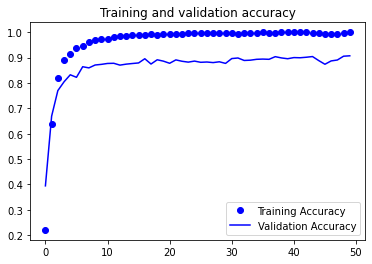

In [21]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, valid_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

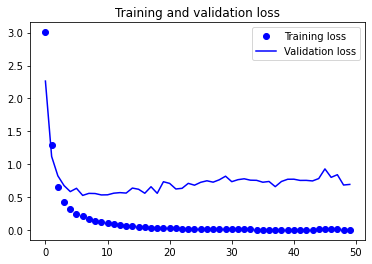

In [22]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [23]:
y_predict = model.predict_classes(X_test_norm)

In [24]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
print(precision, recall)

[0.57352941 0.82222222 0.92347601 0.88041237 0.9437299  0.914791
 0.9765625  0.908867   0.89565217 0.89788054 0.98018293 0.89090909
 0.94553073 0.98603352 0.8962963  0.97487437 0.99315068 0.98452012
 0.85671642 0.75       0.70873786 0.79365079 0.96842105 0.70322581
 0.5        0.92533937 0.7877095  0.65217391 0.74210526 0.82716049
 0.74590164 0.87543253 0.86       0.88311688 0.97457627 0.97513812
 0.98181818 0.94545455 0.93198263 0.80208333 0.82758621 0.71666667
 0.98387097] [0.65       0.97638889 0.94933333 0.94888889 0.88939394 0.9031746
 0.83333333 0.82       0.91555556 0.97083333 0.97424242 0.93333333
 0.98115942 0.98055556 0.8962963  0.92380952 0.96666667 0.88333333
 0.73589744 0.95       0.81111111 0.55555556 0.76666667 0.72666667
 0.72222222 0.85208333 0.78333333 0.5        0.94       0.74444444
 0.60666667 0.93703704 0.71666667 0.97142857 0.95833333 0.90512821
 0.9        0.86666667 0.93333333 0.85555556 0.8        0.71666667
 0.67777778]


<AxesSubplot:>

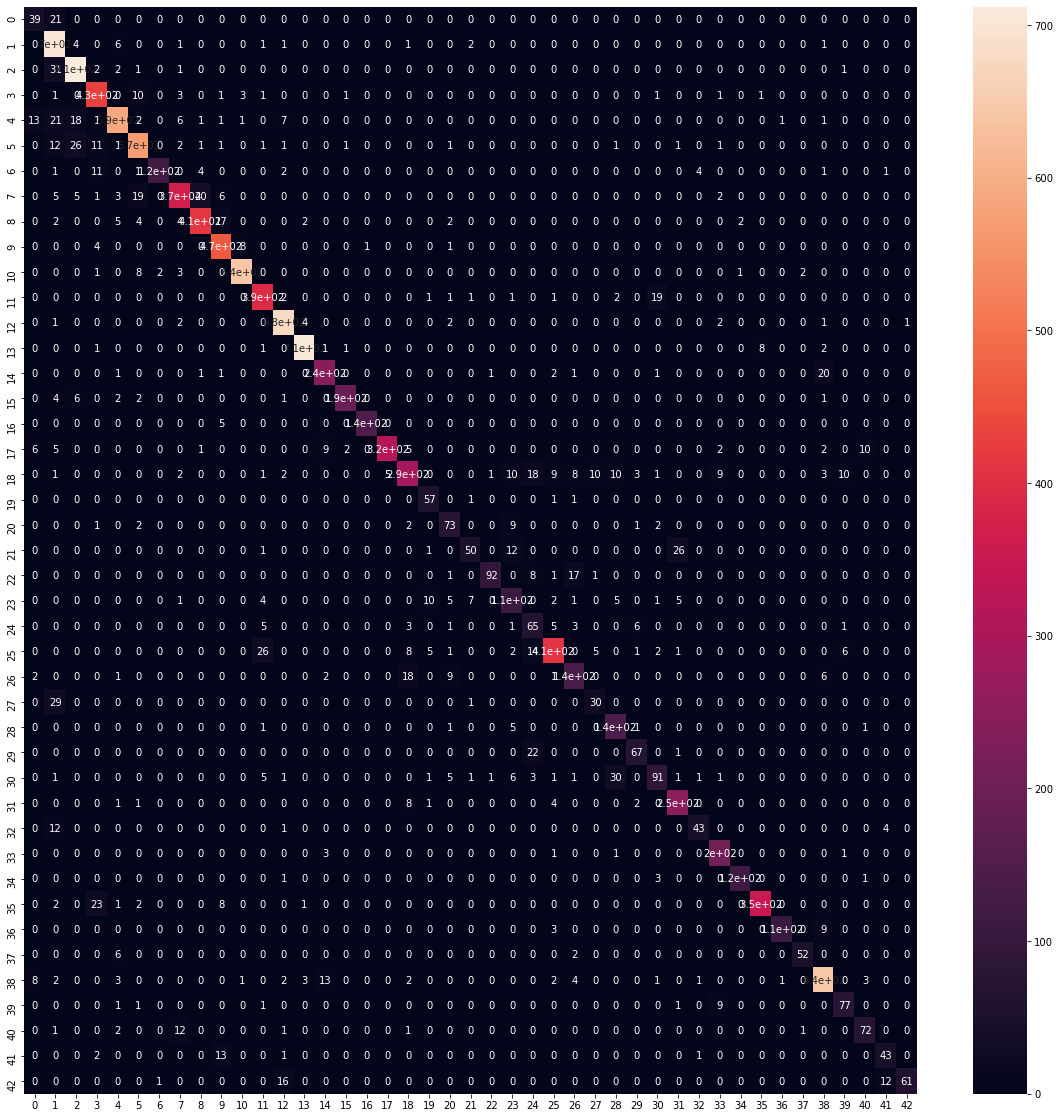

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)


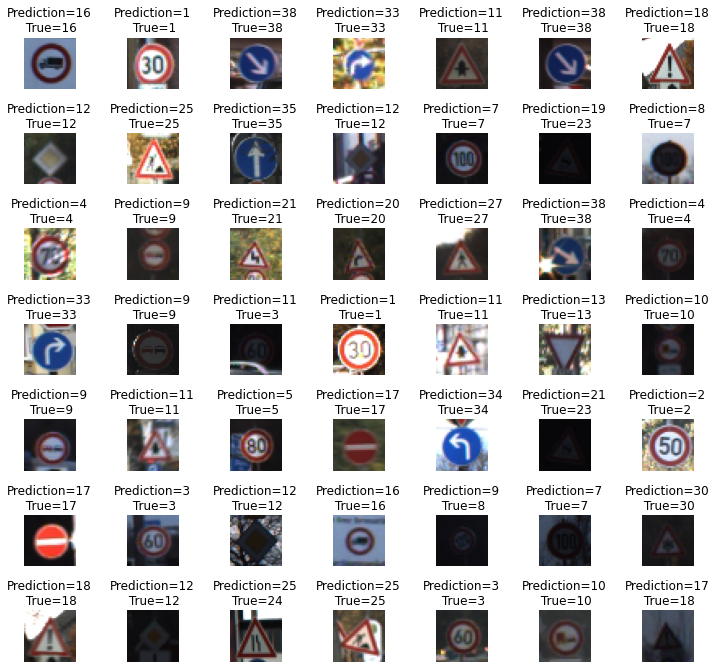

In [26]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(y_predict[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)